## IBM Professional Data Science Specialization Capstone Project- The Battle of Neighborhoods

### Topic: Finding the best place in London to build a student accommodation

### By Sidharth Sankar Sabat

#### 1. Introduction and Problem Description

London is a popular destination for higher education. Students in large numbers from across the globe comes every year for higher education to London.

One of the major concerns for international students when moving to a new city like London is to find an optimal and best accommodation. Student halls are the most reliable means of housing for students, but it is not very easy to find a place in one of the big cities like London as they are in high demand. Hence the goal of the project is to **Explore different neighborhoods of London and find the best area to build a new student hall for international students in London** to solve this persistent problem and to find a new business opportunity. This research is expected to benefit real-estate investors looking for a profitable location or international students looking for a place to live in London.      

From the student perspective, a lot of factors come into play when finding the best accommodation, including location and rent. However, this study will focus only on **the safety and the general atmosphere of the neighborhood.** Distance to universities are also an important factor in choosing a student hall, but as student halls accept students from different universities, it will be disregarded in this project.   


#### 2. Data Acquisition and Data Preprocessing
In this project, following datasets will be used to help solve this problem - London Recorded Crime, List of London Boroughs, and Foursquare API.   
Let's have a look at them.

**a. London Recorded Crime : Geographic Breakdown**   
* London crime records by boroughs in most recent 24 months   
* source: London Datastore   
* url: https://data.london.gov.uk/dataset/recorded_crime_summary

In [1]:
#Import libraries
import pandas as pd
import numpy as np

In [2]:
# Reading the csv through url
url = 'https://data.london.gov.uk/download/recorded_crime_summary/d2e9ccfc-a054-41e3-89fb-53c2bc3ed87a/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv'
crimedf = pd.read_csv(url)
crimedf.head()

,MajorText,MinorText,LookUp_BoroughName,201808,201809,201810,201811,201812,201901,201902,...,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007
0,Arson and Criminal Damage,Arson,Barking and Dagenham,5,3,8,5,1,5,2,...,9,8,6,4,5,6,2,2,4,3
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,101,107,132,105,88,97,127,...,109,97,121,97,103,107,80,86,121,121
2,Burglary,Burglary - Business and Community,Barking and Dagenham,18,33,32,39,33,45,24,...,30,30,25,31,17,28,29,16,16,28
3,Burglary,Burglary - Residential,Barking and Dagenham,84,99,94,106,164,114,107,...,97,114,130,116,123,97,57,41,63,72
4,Drug Offences,Drug Trafficking,Barking and Dagenham,7,10,9,7,4,5,2,...,8,12,3,14,5,6,12,13,11,20


In [3]:
#Rename LookUp_BoroughName column to BoroughName
crimedf.rename(columns={"LookUp_BoroughName":"BoroughName"}, inplace=True)
crimedf.head()

,MajorText,MinorText,BoroughName,201808,201809,201810,201811,201812,201901,201902,...,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007
0,Arson and Criminal Damage,Arson,Barking and Dagenham,5,3,8,5,1,5,2,...,9,8,6,4,5,6,2,2,4,3
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,101,107,132,105,88,97,127,...,109,97,121,97,103,107,80,86,121,121
2,Burglary,Burglary - Business and Community,Barking and Dagenham,18,33,32,39,33,45,24,...,30,30,25,31,17,28,29,16,16,28
3,Burglary,Burglary - Residential,Barking and Dagenham,84,99,94,106,164,114,107,...,97,114,130,116,123,97,57,41,63,72
4,Drug Offences,Drug Trafficking,Barking and Dagenham,7,10,9,7,4,5,2,...,8,12,3,14,5,6,12,13,11,20


In [4]:
# No of records in the dataset
crimedf.shape

(1568, 27)

In [5]:
# Unique values of Boroughs
crimedf['BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [6]:
# Create a calculated column with sum of all incidents happened in 24 months
crimedf['SumOfAllIncidents'] = crimedf.iloc[:,3:27].sum(axis=1)
crimesum = crimedf['SumOfAllIncidents']
crimedf.drop(labels=['SumOfAllIncidents'], axis=1,inplace = True)
crimedf.insert(3, 'SumOfAllIncidents', crimesum)
crimedf.head()

,MajorText,MinorText,BoroughName,SumOfAllIncidents,201808,201809,201810,201811,201812,201901,...,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007
0,Arson and Criminal Damage,Arson,Barking and Dagenham,116,5,3,8,5,1,5,...,9,8,6,4,5,6,2,2,4,3
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2681,101,107,132,105,88,97,...,109,97,121,97,103,107,80,86,121,121
2,Burglary,Burglary - Business and Community,Barking and Dagenham,681,18,33,32,39,33,45,...,30,30,25,31,17,28,29,16,16,28
3,Burglary,Burglary - Residential,Barking and Dagenham,2301,84,99,94,106,164,114,...,97,114,130,116,123,97,57,41,63,72
4,Drug Offences,Drug Trafficking,Barking and Dagenham,199,7,10,9,7,4,5,...,8,12,3,14,5,6,12,13,11,20


In [7]:
# Droping optional columns
crimedf.drop(crimedf.columns[0:2], axis=1, inplace=True)
crimedf.drop(crimedf.columns[2:26], axis=1, inplace=True)
crimedf.head()

,BoroughName,SumOfAllIncidents
0,Barking and Dagenham,116
1,Barking and Dagenham,2681
2,Barking and Dagenham,681
3,Barking and Dagenham,2301
4,Barking and Dagenham,199


In [8]:
# Now group the data by BoroughName
crimedf = crimedf.groupby(['BoroughName'], as_index=False).sum()
crimedf.head()

,BoroughName,SumOfAllIncidents
0,Barking and Dagenham,38847
1,Barnet,59213
2,Bexley,33772
3,Brent,59732
4,Bromley,47529


In [9]:
# Now calculate monthly average of SumOfAllIncidents column data and add as a new column
crimedf['MonthlyAverageSum'] = crimedf['SumOfAllIncidents']/24


In [10]:
# Sorting BoroughNames with most number of incidents
crimedf.sort_values(by='MonthlyAverageSum', ascending=False).head()

,BoroughName,SumOfAllIncidents,MonthlyAverageSum
32,Westminster,140561,5856.708333
27,Southwark,73350,3056.250000
5,Camden,72064,3002.666667
24,Newham,70031,2917.958333
20,Lambeth,68213,2842.208333


In [11]:
# Sorting BoroughNames with least number of incidents
crimedf.sort_values(by='MonthlyAverageSum', ascending=True).head()

,BoroughName,SumOfAllIncidents,MonthlyAverageSum
22,London Heathrow and London City Airports,5996,249.833333
19,Kingston upon Thames,25274,1053.083333
26,Richmond upon Thames,25375,1057.291667
28,Sutton,26854,1118.916667
23,Merton,28229,1176.208333


**b. List of London Boroughs**   
* Information on boroughs and their population & coordinates   
 -Population can be used to calcuate the ratio of reported crime to population for better comparison.   
 -Coordinates can be used to get neighborhood data from Foursquare.   
* source: Wikipedia   
* url: https://en.wikipedia.org/wiki/List_of_London_boroughs

In [12]:
import requests
import lxml
from bs4 import BeautifulSoup

In [13]:
# Web scraping data from wikipedia link using BeautifulSoup package
wikidata = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
btscrap  = BeautifulSoup(wikidata, 'lxml')
btscrap.encode("utf-8-sig")

b'\xef\xbb\xbf<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8-sig"/>\n<title>List of London boroughs - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"bc06306a-6c20-439c-bbfe-0aa2f35b9fce","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":958873870,"wgRevisionId":958873870,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates","Geographic coordinat

In [14]:
BoroughName = []
Population = []
Coordinates = []

for row in btscrap.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        BoroughName.append(cells[0].text.rstrip('\n'))
        Population.append(cells[7].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))

In [15]:
# Create a dataframe using the data stored in the lists
dict = {'BoroughName' : BoroughName,
       'Population' : Population,
       'Coordinates': Coordinates}
df = pd.DataFrame.from_dict(dict)
df.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [16]:
df.shape

(32, 3)

In [17]:
# Strip unwanted texts
df['BoroughName'] = df['BoroughName'].map(lambda x: x.rstrip(']'))
df['BoroughName'] = df['BoroughName'].map(lambda x: x.rstrip('1234567890.'))
df['BoroughName'] = df['BoroughName'].str.replace('note','')
df['BoroughName'] = df['BoroughName'].map(lambda x: x.rstrip(' ['))
df.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [18]:
# Clean coordinates
df[['Coordinates1','Coordinates2','Coordinates3']] = df['Coordinates'].str.split('/',expand=True)
df.head()

,BoroughName,Population,Coordinates,Coordinates1,Coordinates2,Coordinates3
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [19]:
# Now keep the formated coordinate3 column and split that to Lan and Long format
df.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
df[['Latitude','Longitude']] = df['Coordinates3'].str.split(';',expand=True)
df.head()

,BoroughName,Population,Coordinates3,Latitude,Longitude
0,Barking and Dagenham,"194,352",51.5607; 0.1557﻿ (Barking and Dagenham),51.5607,0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51.6252; -0.1517﻿ (Barnet),51.6252,-0.1517﻿ (Barnet)
2,Bexley,"236,687",51.4549; 0.1505﻿ (Bexley),51.4549,0.1505﻿ (Bexley)
3,Brent,"317,264",51.5588; -0.2817﻿ (Brent),51.5588,-0.2817﻿ (Brent)
4,Bromley,"317,899",51.4039; 0.0198﻿ (Bromley),51.4039,0.0198﻿ (Bromley)


In [20]:
# Drop coordinate3 column and strip unwanted texts from lat and Long columns

df.drop(labels=['Coordinates3'], axis=1,inplace = True)
df['Latitude'] = df['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
df['Latitude'] = df['Latitude'].map(lambda x: x.lstrip())
df['Longitude'] = df['Longitude'].map(lambda x: x.rstrip(')'))
df['Longitude'] = df['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
df['Longitude'] = df['Longitude'].map(lambda x: x.rstrip(' ('))
df['Longitude'] = df['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
df['Longitude'] = df['Longitude'].map(lambda x: x.lstrip())
df['Population'] = df['Population'].str.replace(',','')
df.head()

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [21]:
# Unique values in BoroughName column
df['BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

**c. Use Foursquare API to explore top 50 popular places in the neighbourhood**   

In [76]:
# Define Foursquare credentials and version
CLIENT_ID = 'XXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXX' # your Foursquare Secret
VERSION = '20200807'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XXXXX
CLIENT_SECRET:XXXXX


In [24]:
#Create a function to explore all BoroughNames
def getLondonNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['BoroughName', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
#Get top 50 venues in 500m radius of the center of each Borough
LIMIT = 50
london_venues = getLondonNearbyVenues(names=df['BoroughName'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [27]:
print(london_venues.shape)
london_venues.head(10)

(1142, 7)


,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts School
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station
5,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
6,Barking and Dagenham,51.5607,0.1557,Dagenham Swimming Pool,51.560946,0.150054,Pool
7,Barnet,51.6252,-0.1517,The Atrium,51.624726,-0.151933,Café
8,Barnet,51.6252,-0.1517,Made Curtains,51.623485,-0.153565,Home Service
9,Barnet,51.6252,-0.1517,Beaconsfield Road (BF),51.622827,-0.151466,Bus Stop


#### 3. Methodology
In this section, we will explore the cleansed data more thoroughly using visualizations. Then, we will conduct cluster analysis to classify the boroughs into different levels of preference.

**a. Exploratory Analysis**

In [28]:
#Crime data
crimedf.head()

,BoroughName,SumOfAllIncidents,MonthlyAverageSum
0,Barking and Dagenham,38847,1618.625000
1,Barnet,59213,2467.208333
2,Bexley,33772,1407.166667
3,Brent,59732,2488.833333
4,Bromley,47529,1980.375000


In [29]:
#BoroughName info data
df.head()

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [30]:
# Neighbourhood coordinate data
london_venues.head()

,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts School
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station


In [31]:
import matplotlib.pyplot as plt

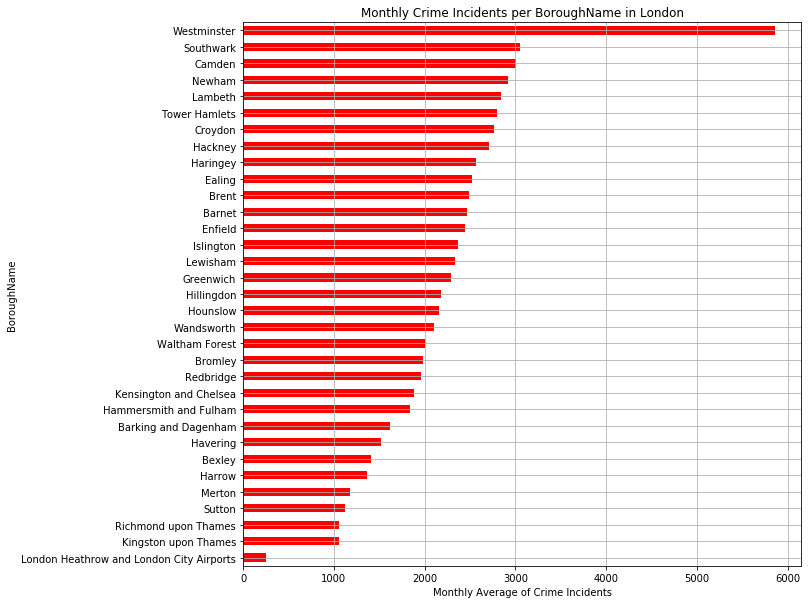

In [32]:
#Visualize crime data
crimedf.set_index('BoroughName')['MonthlyAverageSum'].sort_values().plot(kind='barh', grid=True, color= 'red',figsize=(10,10))
plt.xlabel('Monthly Average of Crime Incidents')
plt.title('Monthly Crime Incidents per BoroughName in London')
plt.show()

The visualization clearly shows **Westminster** has the biggest number of reported crime, followed by **Camden, Newham** and **Southwark**.

In [33]:
#Drop Heathrow Airport as it is not a residential area & not included in population data
crimedf.drop([22], inplace=True)

In [34]:
# Merge crime data and borough information data
df1 = pd.merge(crimedf,df, how='outer', on='BoroughName')
df1.head()

,BoroughName,SumOfAllIncidents,MonthlyAverageSum,Population,Latitude,Longitude
0,Barking and Dagenham,38847,1618.625000,194352,51.5607,0.1557
1,Barnet,59213,2467.208333,369088,51.6252,-0.1517
2,Bexley,33772,1407.166667,236687,51.4549,0.1505
3,Brent,59732,2488.833333,317264,51.5588,-0.2817
4,Bromley,47529,1980.375000,317899,51.4039,0.0198


In [35]:
#Check data type of each columns
df1.dtypes

BoroughName           object
SumOfAllIncidents      int64
MonthlyAverageSum    float64
Population            object
Latitude              object
Longitude             object
dtype: object

In [36]:
df1['Population'] = pd.to_numeric(df1['Population'])
df1['Latitude'] = pd.to_numeric(df1['Latitude'])
df1['Longitude'] = pd.to_numeric(df1['Longitude'])
df1.dtypes

BoroughName           object
SumOfAllIncidents      int64
MonthlyAverageSum    float64
Population             int64
Latitude             float64
Longitude            float64
dtype: object

In [37]:
df1.shape

(32, 6)

In [38]:
#Create a calculated column that shows the number of crimes per 1000 people per month
df1['Population'].astype(float)
df1['CrimeToPop'] = df1['MonthlyAverageSum'] / df1['Population'] * 1000
df1.head()

,BoroughName,SumOfAllIncidents,MonthlyAverageSum,Population,Latitude,Longitude,CrimeToPop
0,Barking and Dagenham,38847,1618.625000,194352,51.5607,0.1557,8.328317
1,Barnet,59213,2467.208333,369088,51.6252,-0.1517,6.684607
2,Bexley,33772,1407.166667,236687,51.4549,0.1505,5.945264
3,Brent,59732,2488.833333,317264,51.5588,-0.2817,7.844676
4,Bromley,47529,1980.375000,317899,51.4039,0.0198,6.229573


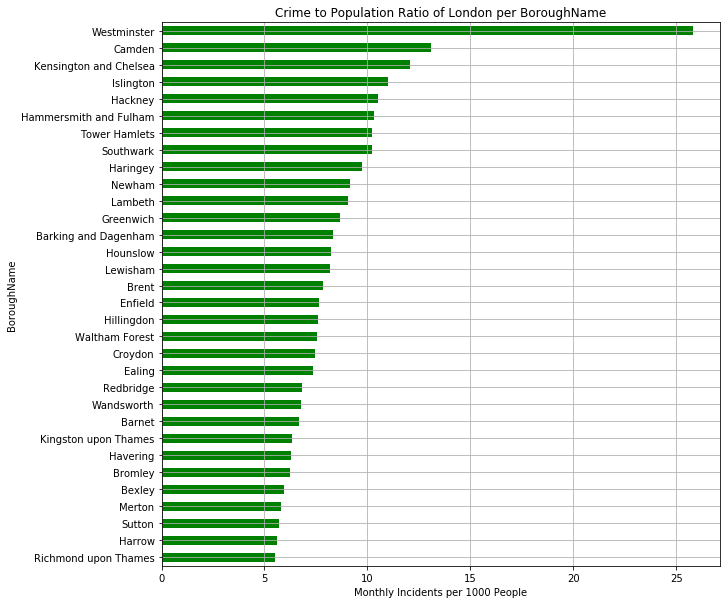

In [39]:
#Visualize crime per 1000 people
df1.set_index('BoroughName')['CrimeToPop'].sort_values().plot(kind='barh', color= 'green', grid=True, figsize=(10,10))
plt.xlabel('Monthly Incidents per 1000 People')
plt.title('Crime to Population Ratio of London per BoroughName')
plt.show()

In [40]:
# Import folium for the map Visualization
import folium
from geopy.geocoders import Nominatim

In [41]:
#Get coordinates of London
address = 'London, UK'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [42]:
# Create a map visualization of London using folium
map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

We can see that Westminster and Camden still remains top 2 dangerous area even after taking population into consideration.

**b. Cluster Analysis**   
In this part, we will conduct K-means clustering to group the boroughs according to what convenience facilities they have using Foursquare data.

In [43]:
print('No of unique categories are: {} '.format(len(london_venues['Venue Category'].unique())))
london_venues.head()

No of unique categories are: 186 


,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts School
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station


In [44]:
# One hot encoding for cluster analysis
onehotenc = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

In [45]:
# Add borough name back to dataframe
borough = london_venues['BoroughName']
onehotenc.insert(0, 'BoroughName', borough)
onehotenc.head()

,BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
onehotenc.shape

(1142, 187)

In [47]:
# Group rows by borough and take the mean of frequency of each venue category
grouped = onehotenc.groupby('BoroughName').mean().reset_index()
grouped

,BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Barking and Dagenham,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00
1,Barnet,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00
2,Bexley,0.00000,0.000000,0.000000,0.000000,0.037037,0.00,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.037037,0.00000,0.037037,0.00,0.00,0.00,0.00
3,Brent,0.00000,0.000000,0.000000,0.000000,0.040000,0.00,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00
4,Bromley,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00
5,Camden,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.020000,0.02,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00
6,Croydon,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00
7,Ealing,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.00,0.00,...,0.000000,0.00,0.000000,0.000000,0.04000,0.000000,0.02,0.00,0.00,0.00
8,Enfield,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.020000,0.00,0.000000,0.040000,0.00000,0.000000,0.00,0.00,0.02,0.00
9,Greenwich,0.02439,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.000000,0.02439,0.024390,0.00,0.00,0.00,0.00


In [48]:
# Find top 5 venues for each neighborhood
num_top_venues = 5

for hood in grouped['BoroughName']:
    print("----"+hood+"----")
    temp = grouped[grouped['BoroughName'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                  venue  freq
0  Gym / Fitness Center  0.14
1   Martial Arts School  0.14
2                  Pool  0.14
3           Bus Station  0.14
4           Supermarket  0.14


----Barnet----
                venue  freq
0                Café  0.50
1            Bus Stop  0.25
2        Home Service  0.25
3  African Restaurant  0.00
4                Park  0.00


----Bexley----
                  venue  freq
0                   Pub  0.11
1        Clothing Store  0.11
2           Coffee Shop  0.11
3           Supermarket  0.07
4  Fast Food Restaurant  0.07


----Brent----
            venue  freq
0     Coffee Shop  0.12
1           Hotel  0.10
2   Grocery Store  0.06
3  Clothing Store  0.06
4             Bar  0.04


----Bromley----
                  venue  freq
0        Clothing Store  0.15
1           Coffee Shop  0.12
2  Gym / Fitness Center  0.05
3                   Bar  0.05
4          Burger Joint  0.05


----Camden----
            venue  freq
0         

In [49]:
# Put into pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['BoroughName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['BoroughName'] = grouped['BoroughName']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,BoroughName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pool,Gym / Fitness Center,Bus Station,Supermarket,Martial Arts School,Park,Golf Course,Dim Sum Restaurant,English Restaurant,Fast Food Restaurant
1,Barnet,Café,Home Service,Bus Stop,Yoga Studio,English Restaurant,Flea Market,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market
2,Bexley,Coffee Shop,Pub,Clothing Store,Supermarket,Fast Food Restaurant,Pharmacy,Bakery,Video Game Store,American Restaurant,Plaza
3,Brent,Coffee Shop,Hotel,Grocery Store,Clothing Store,Bar,Sandwich Place,Italian Restaurant,Sporting Goods Shop,American Restaurant,Ice Cream Shop
4,Bromley,Clothing Store,Coffee Shop,Pizza Place,Burger Joint,Gym / Fitness Center,Bar,Fast Food Restaurant,Furniture / Home Store,Burrito Place,Café


In [50]:
# K Means Clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [51]:
kclusters = 5
london_cluster = grouped.drop('BoroughName', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_cluster)

kmeans.labels_[0:10] 

array([1, 3, 1, 1, 1, 1, 1, 1, 1, 1])

In [52]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto coords to add latitude/longitude for each neighborhood
london_merged = df1
london_merged = london_merged.join(venues_sorted.set_index('BoroughName'), on='BoroughName')

london_merged.head()

,BoroughName,SumOfAllIncidents,MonthlyAverageSum,Population,Latitude,Longitude,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,38847,1618.625000,194352,51.5607,0.1557,8.328317,1,Pool,Gym / Fitness Center,Bus Station,Supermarket,Martial Arts School,Park,Golf Course,Dim Sum Restaurant,English Restaurant,Fast Food Restaurant
1,Barnet,59213,2467.208333,369088,51.6252,-0.1517,6.684607,3,Café,Home Service,Bus Stop,Yoga Studio,English Restaurant,Flea Market,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market
2,Bexley,33772,1407.166667,236687,51.4549,0.1505,5.945264,1,Coffee Shop,Pub,Clothing Store,Supermarket,Fast Food Restaurant,Pharmacy,Bakery,Video Game Store,American Restaurant,Plaza
3,Brent,59732,2488.833333,317264,51.5588,-0.2817,7.844676,1,Coffee Shop,Hotel,Grocery Store,Clothing Store,Bar,Sandwich Place,Italian Restaurant,Sporting Goods Shop,American Restaurant,Ice Cream Shop
4,Bromley,47529,1980.375000,317899,51.4039,0.0198,6.229573,1,Clothing Store,Coffee Shop,Pizza Place,Burger Joint,Gym / Fitness Center,Bar,Fast Food Restaurant,Furniture / Home Store,Burrito Place,Café


In [53]:
london_merged[["BoroughName", "Cluster Labels", "1st Most Common Venue" , "2nd Most Common Venue", "3rd Most Common Venue","4th Most Common Venue", "5th Most Common Venue"]].head(10)

,BoroughName,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barking and Dagenham,1,Pool,Gym / Fitness Center,Bus Station,Supermarket,Martial Arts School
1,Barnet,3,Café,Home Service,Bus Stop,Yoga Studio,English Restaurant
2,Bexley,1,Coffee Shop,Pub,Clothing Store,Supermarket,Fast Food Restaurant
3,Brent,1,Coffee Shop,Hotel,Grocery Store,Clothing Store,Bar
4,Bromley,1,Clothing Store,Coffee Shop,Pizza Place,Burger Joint,Gym / Fitness Center
5,Camden,1,Hotel,Café,Coffee Shop,Garden,Hotel Bar
6,Croydon,1,Pub,Coffee Shop,Portuguese Restaurant,Asian Restaurant,Park
7,Ealing,1,Coffee Shop,Italian Restaurant,Pizza Place,Hotel,Clothing Store
8,Enfield,1,Clothing Store,Coffee Shop,Optical Shop,Supermarket,Pub
9,Greenwich,1,Pub,Clothing Store,Fast Food Restaurant,Coffee Shop,Hotel


In [54]:
# create map
ClustersMap = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['BoroughName'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(ClustersMap)
       
ClustersMap

Now let's observe each clusters and name them according to their characteristics

In [55]:
# Cluster 0: Traveler area (Hotel, Restaurant, Airport etc.)
cls0 = london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]
cls0[["BoroughName", "Cluster Labels", "1st Most Common Venue" , "2nd Most Common Venue", "3rd Most Common Venue","4th Most Common Venue", "5th Most Common Venue",  "6th Most Common Venue","7th Most Common Venue", "8th Most Common Venue", "9th Most Common Venue", "10th Most Common Venue"]]

,BoroughName,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Newham,0,Hotel,Chinese Restaurant,Airport,Airport Lounge,Airport Service,Sandwich Place,Pharmacy,Duty-free Shop,Rafting,Escape Room


In [56]:
# Cluster 1:  Lively area (Pool,Bus Station, Pub, Coffee Shop, Supermarket, CLothing Store)
cls1 = london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]
cls1[["BoroughName", "Cluster Labels", "1st Most Common Venue" , "2nd Most Common Venue", "3rd Most Common Venue","4th Most Common Venue", "5th Most Common Venue",  "6th Most Common Venue","7th Most Common Venue", "8th Most Common Venue", "9th Most Common Venue", "10th Most Common Venue"]]

,BoroughName,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,1,Pool,Gym / Fitness Center,Bus Station,Supermarket,Martial Arts School,Park,Golf Course,Dim Sum Restaurant,English Restaurant,Fast Food Restaurant
2,Bexley,1,Coffee Shop,Pub,Clothing Store,Supermarket,Fast Food Restaurant,Pharmacy,Bakery,Video Game Store,American Restaurant,Plaza
3,Brent,1,Coffee Shop,Hotel,Grocery Store,Clothing Store,Bar,Sandwich Place,Italian Restaurant,Sporting Goods Shop,American Restaurant,Ice Cream Shop
4,Bromley,1,Clothing Store,Coffee Shop,Pizza Place,Burger Joint,Gym / Fitness Center,Bar,Fast Food Restaurant,Furniture / Home Store,Burrito Place,Café
5,Camden,1,Hotel,Café,Coffee Shop,Garden,Hotel Bar,Breakfast Spot,Pizza Place,Italian Restaurant,Train Station,Burger Joint
6,Croydon,1,Pub,Coffee Shop,Portuguese Restaurant,Asian Restaurant,Park,Spanish Restaurant,Burger Joint,Burrito Place,Café,Caribbean Restaurant
7,Ealing,1,Coffee Shop,Italian Restaurant,Pizza Place,Hotel,Clothing Store,Burger Joint,Pub,Park,Vietnamese Restaurant,Polish Restaurant
8,Enfield,1,Clothing Store,Coffee Shop,Optical Shop,Supermarket,Pub,Department Store,Pharmacy,Video Game Store,Bookstore,Mobile Phone Shop
9,Greenwich,1,Pub,Clothing Store,Fast Food Restaurant,Coffee Shop,Hotel,Pharmacy,Sandwich Place,Plaza,Platform,Grocery Store
10,Hackney,1,Pub,Brewery,Coffee Shop,Café,Bakery,Grocery Store,Clothing Store,Modern European Restaurant,Cocktail Bar,Hotel


In [57]:
# Cluster 2: Fitness Area (Pool, Gym, Pub)
cls2=london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]
cls2[["BoroughName", "Cluster Labels", "1st Most Common Venue" , "2nd Most Common Venue", "3rd Most Common Venue","4th Most Common Venue", "5th Most Common Venue",  "6th Most Common Venue","7th Most Common Venue", "8th Most Common Venue", "9th Most Common Venue", "10th Most Common Venue"]]

,BoroughName,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Waltham Forest,2,Pub,Construction & Landscaping,Beer Store,Garden Center,Tea Room,Grocery Store,Pizza Place,Gym / Fitness Center,Coffee Shop,Art Gallery


In [58]:
# Cluster 3: Quiet area (Cafe, Bus Stop, Home Service)
cls3=london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]
cls3[["BoroughName", "Cluster Labels", "1st Most Common Venue" , "2nd Most Common Venue", "3rd Most Common Venue","4th Most Common Venue", "5th Most Common Venue",  "6th Most Common Venue","7th Most Common Venue", "8th Most Common Venue", "9th Most Common Venue", "10th Most Common Venue"]]

,BoroughName,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,3,Café,Home Service,Bus Stop,Yoga Studio,English Restaurant,Flea Market,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market


In [59]:
# Cluster 4: Refreshing area (Park, Cafe)
cls4=london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]
cls4[["BoroughName", "Cluster Labels", "1st Most Common Venue" , "2nd Most Common Venue", "3rd Most Common Venue","4th Most Common Venue", "5th Most Common Venue",  "6th Most Common Venue","7th Most Common Venue", "8th Most Common Venue", "9th Most Common Venue", "10th Most Common Venue"]]

,BoroughName,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Hounslow,4,Metro Station,Café,Park,Bed & Breakfast,Yoga Studio,English Restaurant,Flea Market,Fish Market,Film Studio,Fast Food Restaurant


### 4. Results & Recommendation

Now let's review all the analysis made in this project before we make a conclusion on which area to live as an international student or to invest as a student accommodation builder.   

Like mentioned in the beginning, our key criteria of location decision will be based on safety and atmosphere.   

**a. Safety**   
Safety can be determined by the criminal rate we have calculated. We can use the 'CrimeToPop' (Recorded crime per 1000 people) as our safety score.

In [60]:
crimetopop = london_merged['CrimeToPop']

london_merged.drop(['CrimeToPop'], inplace=True, axis=1)
london_merged.insert(1, 'CrimeToPop', crimetopop)
london_merged.sort_values(by='CrimeToPop', ascending = False)

,BoroughName,CrimeToPop,SumOfAllIncidents,MonthlyAverageSum,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Westminster,25.818562,140561,5856.708333,226841,51.4973,-0.1372,1,Coffee Shop,Hotel,Theater,Sporting Goods Shop,Sandwich Place,Hotel Bar,Juice Bar,Sushi Restaurant,Breakfast Spot,Restaurant
5,Camden,13.071042,72064,3002.666667,229719,51.5290,-0.1255,1,Hotel,Café,Coffee Shop,Garden,Hotel Bar,Breakfast Spot,Pizza Place,Italian Restaurant,Train Station,Burger Joint
18,Kensington and Chelsea,12.076569,45097,1879.041667,155594,51.5020,-0.1947,1,Juice Bar,Café,Restaurant,Bakery,Gym / Fitness Center,Clothing Store,Burger Joint,Japanese Restaurant,Cupcake Shop,Sandwich Place
17,Islington,10.989164,56880,2370.000000,215667,51.5416,-0.1022,1,Pub,Mediterranean Restaurant,Cocktail Bar,Park,Theater,Middle Eastern Restaurant,French Restaurant,Ice Cream Shop,Burger Joint,Boutique
10,Hackney,10.516268,64960,2706.666667,257379,51.5450,-0.0553,1,Pub,Brewery,Coffee Shop,Café,Bakery,Grocery Store,Clothing Store,Modern European Restaurant,Cocktail Bar,Hotel
11,Hammersmith and Fulham,10.313307,44228,1842.833333,178685,51.4927,-0.2339,1,Pub,Indian Restaurant,Italian Restaurant,Café,Gastropub,Vietnamese Restaurant,Clothing Store,Japanese Restaurant,Park,Gym / Fitness Center
28,Tower Hamlets,10.244512,67095,2795.625000,272890,51.5099,-0.0059,1,Hotel,Sandwich Place,Italian Restaurant,Coffee Shop,Pizza Place,Chinese Restaurant,Light Rail Station,Grocery Store,Asian Restaurant,Gym / Fitness Center
26,Southwark,10.239928,73350,3056.250000,298464,51.5035,-0.0804,1,Pub,Coffee Shop,Hotel,Theater,English Restaurant,Hotel Bar,Art Gallery,Pizza Place,Road,Restaurant
12,Haringey,9.736344,61546,2564.416667,263386,51.6000,-0.1119,1,Park,Indian Restaurant,Bar,Gym / Fitness Center,Italian Restaurant,Grocery Store,Light Rail Station,Mediterranean Restaurant,Movie Theater,Fast Food Restaurant
23,Newham,9.169424,70031,2917.958333,318227,51.5077,0.0469,0,Hotel,Chinese Restaurant,Airport,Airport Lounge,Airport Service,Sandwich Place,Pharmacy,Duty-free Shop,Rafting,Escape Room


**b. Atmosphere**   
And from the cluster analysis made above, lets assign a name to each clusters according to the characteristics inferrable from the popular venues.

According to above results, **Cluster 0** is **Traveller area** with Hotel, Resturant, Airport etc. as popular places.

In [61]:
london_merged.loc[london_merged['Cluster Labels'] == 0].BoroughName.unique()

array(['Newham'], dtype=object)

According to above results, **Cluster 1** is **Lively Area** with Pool,Bus Station, Pub, Coffee Shop, Supermarket and CLothing Stores near by.

In [62]:
london_merged.loc[london_merged['Cluster Labels'] == 1].BoroughName.unique()

array(['Barking and Dagenham', 'Bexley', 'Brent', 'Bromley', 'Camden',
       'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Wandsworth', 'Westminster'], dtype=object)

According to above results, **Cluster 2** is **Fitness Area** with Pool, Gym, Pubs

In [63]:
london_merged.loc[london_merged['Cluster Labels'] == 2].BoroughName.unique()

array(['Waltham Forest'], dtype=object)

According to above results, **Cluster 3** is **Quiet Area** with Cafe, Bus Stop, Yoga Studio as top venues.

In [64]:
london_merged.loc[london_merged['Cluster Labels'] == 3].BoroughName.unique()

array(['Barnet'], dtype=object)

According to above results, **Cluster 4** is **Refreshing Area** with Park and cafe

In [65]:
london_merged.loc[london_merged['Cluster Labels'] == 4].BoroughName.unique()

array(['Hounslow'], dtype=object)

Now, what kind of atmosphere students may prefer, normally differs by every student. Based on my personal preference as a student moving to London and some common logic, lets assign scores to each cluster.   
I have decided to give preference in the order of Fitness Area, Lively Area, Refreshing Area, and Traveler Area.


**c. Weighted score table**   
Finally, let's calculate the scores of each borough.

In [66]:
score = london_merged[['BoroughName','CrimeToPop','Cluster Labels']].copy()
score.head()

,BoroughName,CrimeToPop,Cluster Labels
0,Barking and Dagenham,8.328317,1
1,Barnet,6.684607,3
2,Bexley,5.945264,1
3,Brent,7.844676,1
4,Bromley,6.229573,1


In [67]:
score['Safety'] = (score['CrimeToPop']-score['CrimeToPop'].min())/(score['CrimeToPop'].max()-score['CrimeToPop'].min())
score['Safety'] = (score['Safety'] - 1) * -1
score.head()

,BoroughName,CrimeToPop,Cluster Labels,Safety
0,Barking and Dagenham,8.328317,1,0.861862
1,Barnet,6.684607,3,0.942858
2,Bexley,5.945264,1,0.979291
3,Brent,7.844676,1,0.885694
4,Bromley,6.229573,1,0.965281


In [68]:
score['Atmosphere'] = 0
score.head()

,BoroughName,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Barking and Dagenham,8.328317,1,0.861862,0
1,Barnet,6.684607,3,0.942858,0
2,Bexley,5.945264,1,0.979291,0
3,Brent,7.844676,1,0.885694,0
4,Bromley,6.229573,1,0.965281,0


In [69]:
for i in range(32):
    if score.iloc[i,2] == 2:
        score.iloc[i,4] = 1
    elif score.iloc[i,2] == 1:
        score.iloc[i,4] = 0.9
    elif score.iloc[i,2] == 0:
        score.iloc[i,2] = 0.8
    elif score.iloc[i,2] == 3:
        score.iloc[i,4] = 0.7
    else:
        score.iloc[i,2] = 0.6
                
score.head()

,BoroughName,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Barking and Dagenham,8.328317,1.0,0.861862,0.9
1,Barnet,6.684607,3.0,0.942858,0.7
2,Bexley,5.945264,1.0,0.979291,0.9
3,Brent,7.844676,1.0,0.885694,0.9
4,Bromley,6.229573,1.0,0.965281,0.9


In [70]:
score.drop(['CrimeToPop'], inplace=True, axis=1)
score.drop(['Cluster Labels'], inplace=True, axis=1)
score['Score'] = score['Safety'] + score['Atmosphere']
score.sort_values(by='Score', ascending = False)

,BoroughName,Safety,Atmosphere,Score
25,Richmond upon Thames,1.000000,0.9,1.900000
29,Waltham Forest,0.899685,1.0,1.899685
13,Harrow,0.995243,0.9,1.895243
27,Sutton,0.990822,0.9,1.890822
22,Merton,0.987051,0.9,1.887051
2,Bexley,0.979291,0.9,1.879291
4,Bromley,0.965281,0.9,1.865281
14,Havering,0.962035,0.9,1.862035
19,Kingston upon Thames,0.961135,0.9,1.861135
30,Wandsworth,0.938423,0.9,1.838423


In [71]:
score.shape

(32, 4)

In [72]:
score.sort_values(by='Score', ascending = False).head(5)

,BoroughName,Safety,Atmosphere,Score
25,Richmond upon Thames,1.000000,0.9,1.900000
29,Waltham Forest,0.899685,1.0,1.899685
13,Harrow,0.995243,0.9,1.895243
27,Sutton,0.990822,0.9,1.890822
22,Merton,0.987051,0.9,1.887051


#### 5. Conclusion

Based on the analysis so far and based on safety and atmosphere of the neighborhood, it is clear that below five boroughs are the best places to build a student hall.

The top five boroughs all belong to the lively Area and fitness area cluster with many pubs, resturants, pub, pool, Gym/Fitness Centre and coffee shops. Therefore, what differentiates them is the safety score, which was calculated from monthly recorded crimes per 1000 people.


In [73]:
ind = score.sort_values(by='Score', ascending = False).head(5)

In [74]:
top5 = df1.iloc[ind.index]
top5

,BoroughName,SumOfAllIncidents,MonthlyAverageSum,Population,Latitude,Longitude,CrimeToPop
25,Richmond upon Thames,25375,1057.291667,191365,51.4479,-0.3260,5.525000
29,Waltham Forest,48231,2009.625000,265797,51.5908,-0.0134,7.560751
13,Harrow,32835,1368.125000,243372,51.5898,-0.3346,5.621538
27,Sutton,26854,1118.916667,195914,51.3618,-0.1945,5.711264
22,Merton,28229,1176.208333,203223,51.4014,-0.1958,5.787772


In [75]:
# make a map of Toronto using folium
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(top5['Latitude'], top5['Longitude'], top5['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

**Limitations**   
However, it obviously seems strange that the best places to live in London are all far out suburbs.
This is due to limitations this research holds. Among numerous factors that determine a good neighborhood, the factors taken into consideration are based on simplified factors, what type of venues are popular and how many crime incidents are recorded. This means that serious crimes like homicide was treated the same as a comparatively petty crime like shoplifting. Moreover, the number of stores in the neighborhood may be as important as what type of stores there are.

To overcome the limitations of this study, some more data would be required such as distance to city center and housing prices etc. Also, taking crime categories into a consideration and weighing them differently may be helpful. However, this research is still meaningful in a way to explore the neighborhoods in depth and to decide the best place to build a student accommodation.
